In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
# Dataset from: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#
data = pd.read_csv('ObesityDataSet.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Encoding labels of string based attributes
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
data['NObeyesdad']= label_encoder.fit_transform(data['NObeyesdad'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight']= label_encoder.fit_transform(data['family_history_with_overweight'])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.0,1,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,1
1,0,21,1.52,56.0,1,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,1
2,1,23,1.80,77.0,1,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,1
3,1,27,1.80,87.0,0,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,4
4,1,22,1.78,89.8,0,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,5


In [4]:
data = data.loc[:, ['Weight', 'Height']]
data

,Weight,Height
0,64.0,1.62
1,56.0,1.52
2,77.0,1.80
3,87.0,1.80
4,89.8,1.78
...,...,...
143,75.0,1.68
144,67.0,1.61
145,70.0,1.62
146,51.0,1.56


In [5]:
data = data.values

C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


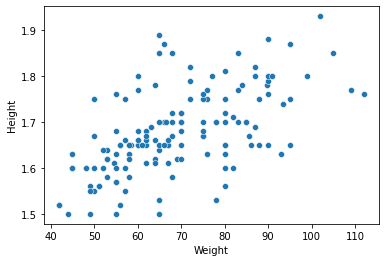

In [6]:
# Scatter plot of the data
sns.scatterplot(data[:,0], data[:, 1])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [7]:
def calculate_cost(X, centroids, cluster):
    s = 0
    for i, val in enumerate(X):
        s += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
    return s

In [8]:
import random
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    # STEP 1: Select k random cluster centroids
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices, :]
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroids):
                # STEP 2: Calculating distance between each data point and cluster centroids
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # STEP 3: Assigning the data point to the cluster center whose distance from the 
                # cluster center is minimum of all the cluster centers
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        # STEP 4: Recalculating the new cluster centroids using the given forumla based on mean of values
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # STEP 5: Recalculating distance between new cluster centroids and data points
        if np.count_nonzero(centroids-new_centroids) == 0:
          diff = 0
        else:
          centroids = new_centroids
    return centroids, cluster  

In [9]:
cost_list = []

for k in range(1, 10):
    centroids, cluster = kmeans(data, k)
    cost = calculate_cost(data, centroids, cluster)
    cost_list.append(cost)
cost_list

[1823.3372591436778,
 981.1278266490765,
 728.8360297537058,
 562.7062785831968,
 435.42036717384843,
 398.7335775020495,
 359.641361402798,
 284.2725281350132,
 251.83751306167457]

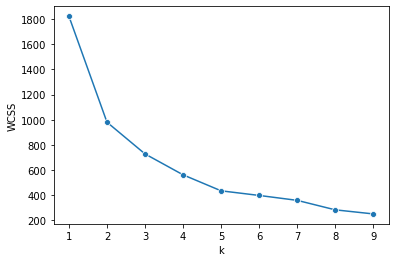

In [10]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [13]:
k = 4
centroids, cluster = kmeans(data, k)
centroids

array([[48.        ,  1.58473684],
       [69.7375    ,  1.69416667],
       [57.75      ,  1.64175   ],
       [88.4097561 ,  1.73463415]])

C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kaustubh\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


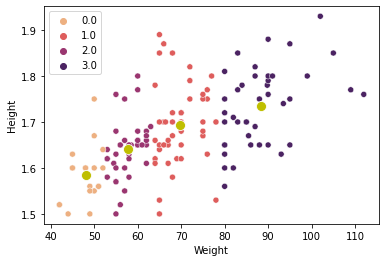

In [20]:
# Plotting the scatter plot with clustering
sns.scatterplot(data[:,0], data[:, 1], hue=cluster, palette='flare')
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()